<a style = 'color:blue;' href='https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center'> 
    Blood Transfusion Service Center Data </a>

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
%matplotlib inline

## Functions

In [2]:
#     Features:(n_examples, n_features)
#     Labels: (n_examples, 1)
#     Weights:(n_features, 1)


# -- Sigmoid function -- #
def sigmoid(z):
    " Return the sigmoid function "
    return 1/(1+np.exp(-z))

# -- Predictor function -- #
def predict(features, weights):
    '''
    Returns probabilities
    of class label
    '''
    z = np.dot(features, weights)
    return sigmoid(z)

# -- Cost function -- #
def cost_function(features, labels, weights):
    '''    
    Write down the average cross-entropy loss
    '''
    observations = len(labels)

    predictions = predict(features, weights)

    # You may use this format or define in your own way
    # Note: This is for binary cros-entropy loss.
    
    # We can divide the binary cross entropy loss into two parts
    # One for p(y=1) and another for p(y=0)

    # Take the error when label=1
    class1_cost = np.dot(labels, np.log(predictions))

    # Take the error when label=0
    class2_cost = np.dot(1-labels, np.log(1-predictions))

    # Take the sum of both costs
    cost = class1_cost + class2_cost

    # Take the average cost
    cost = -(cost/observations)

    return cost


def update_weights(features, labels, weights, lr):
    '''
   Gradient Descent
    '''
    N = len(features.columns) # number of features

    #1 - Get Predictions
    predictions = predict(features, weights)

    gradient = np.dot((predictions-labels), features) # Write down the gradient of the cost

    # 3 Take the average cost derivative for each feature
    gradient /= N

    # 4 Update the weights using the learning rate lr
    weights = weights - lr*gradient # Write down the update rule here

    return weights

def decision_boundary(prob):
    return 1 if prob >= .5 else 0 # You may change the threshold from 0.5 

def train(features, labels, weights, lr, iters):
    cost_history = [np.float64('inf')]

    for i in range(iters):
        weights = update_weights(features, labels, weights, lr)

        #Calculate error for auditing purposes
        cost = cost_function(features, labels, weights)
        
        cost_history.append(cost)

        print("iter: "+str(i) + " cost: "+str(cost))

    return weights, cost_history

def accuracy(predicted_labels, actual_labels):
    diff = predicted_labels - actual_labels
    return '{}%'.format(np.round((1.0 - (float(np.count_nonzero(diff)) / len(diff)))*100, 2))

## Data

In [3]:
features = ['Feature_'+str(i) for i in range(1,5)] + ['output']
data = pd.read_csv('./transfusion.data', header = [0], sep = ',')
data.columns = features
print(data.shape)
data.head()

(748, 5)


,Feature_1,Feature_2,Feature_3,Feature_4,output
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [4]:
# data.isnull().sum()
# data.describe()
# data.nunique(axis = 0)

In [5]:
X = data.iloc[:,np.array([3,4])-1]
y = data.output

In [6]:
scale = preprocessing.StandardScaler()
X = pd.DataFrame(scale.fit_transform(X), columns = ['Feature_1', 'Feature_2'])

In [7]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
# Initialize the weights
wts = np.random.normal(0, 1, len(X_train.columns))
# wts = np.zeros(len(X_train.columns))

# Training
optimal_wts, loss = train(X_train, y_train, wts, 1e-4, 1000)

iter: 0 cost: 0.7978029713754323
iter: 1 cost: 0.7956428004286706
iter: 2 cost: 0.7935087649744252
iter: 3 cost: 0.7914007572295314
iter: 4 cost: 0.7893186671395283
iter: 5 cost: 0.7872623824047144
iter: 6 cost: 0.7852317885054454
iter: 7 cost: 0.7832267687265714
iter: 8 cost: 0.7812472041809156
iter: 9 cost: 0.7792929738316955
iter: 10 cost: 0.7773639545137946
iter: 11 cost: 0.7754600209538035
iter: 12 cost: 0.7735810457887451
iter: 13 cost: 0.7717268995834152
iter: 14 cost: 0.7698974508462753
iter: 15 cost: 0.7680925660438442
iter: 16 cost: 0.7663121096135452
iter: 17 cost: 0.7645559439749775
iter: 18 cost: 0.7628239295395937
iter: 19 cost: 0.7611159247187798
iter: 20 cost: 0.7594317859303452
iter: 21 cost: 0.7577713676034504
iter: 22 cost: 0.7561345221820106
iter: 23 cost: 0.754521100126637
iter: 24 cost: 0.7529309499151907
iter: 25 cost: 0.7513639180420408
iter: 26 cost: 0.7498198490161416
iter: 27 cost: 0.7482985853580594
iter: 28 cost: 0.746799967596097
iter: 29 cost: 0.745323834

iter: 592 cost: 0.6594826591548543
iter: 593 cost: 0.65947421098289
iter: 594 cost: 0.6594657943685486
iter: 595 cost: 0.6594574091823959
iter: 596 cost: 0.6594490552956184
iter: 597 cost: 0.6594407325800197
iter: 598 cost: 0.6594324409080156
iter: 599 cost: 0.659424180152631
iter: 600 cost: 0.6594159501874963
iter: 601 cost: 0.6594077508868418
iter: 602 cost: 0.6593995821254963
iter: 603 cost: 0.6593914437788819
iter: 604 cost: 0.6593833357230101
iter: 605 cost: 0.6593752578344794
iter: 606 cost: 0.6593672099904702
iter: 607 cost: 0.659359192068742
iter: 608 cost: 0.6593512039476297
iter: 609 cost: 0.6593432455060405
iter: 610 cost: 0.659335316623449
iter: 611 cost: 0.6593274171798953
iter: 612 cost: 0.6593195470559806
iter: 613 cost: 0.6593117061328644
iter: 614 cost: 0.6593038942922606
iter: 615 cost: 0.659296111416434
iter: 616 cost: 0.659288357388198
iter: 617 cost: 0.6592806320909105
iter: 618 cost: 0.6592729354084702
iter: 619 cost: 0.6592652672253149
iter: 620 cost: 0.659257627

In [9]:
wts

array([-0.38115302, -0.62548593])

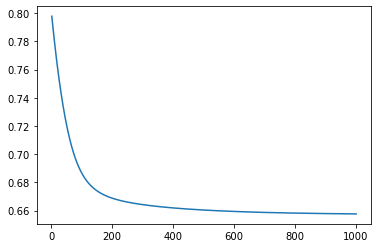

In [10]:
# Plot the loss against the number of epochs
plt.plot(np.arange(1, len(loss)+1, 1), loss)
plt.show()

In [11]:
train_predictions = []
for elem in predict(X_train, optimal_wts):
    train_predictions.append(decision_boundary(elem))
test_predictions = []
for elem in predict(X_test, optimal_wts):
    test_predictions.append(decision_boundary(elem))

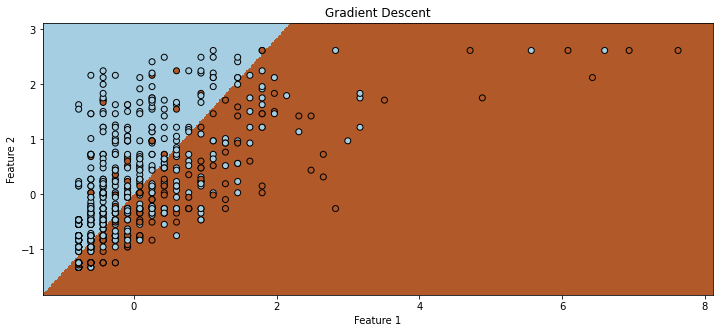

In [12]:
# # Plot the decision boundary for two features. For that, we will assign a color to each
# # point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X['Feature_1'].min() - 0.5, X['Feature_1'].max() + 0.5
y_min, y_max = X['Feature_2'].min() - 0.5, X['Feature_2'].max() + 0.5
h = 0.02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
probs = predict(np.c_[xx.ravel(), yy.ravel()], optimal_wts[[0,1]])
mesh_preds = []
for elem in probs:
    mesh_preds.append(decision_boundary(elem))
Z = np.array(mesh_preds)
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(12, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading = 'auto')

plt.scatter(X['Feature_1'], X['Feature_2'], c=y, edgecolors="k", cmap=plt.cm.Paired)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title('Gradient Descent')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max());
# plt.xticks(())
# plt.yticks(());

In [13]:
# Accuracy
print("Traning accuracy using gradient descent: {}".format(accuracy(train_predictions, y_train)))
print("Testing accuracy using gradient descent: {}".format(accuracy(test_predictions, y_test)))

Traning accuracy using gradient descent: 64.05%
Testing accuracy using gradient descent: 65.33%


## Scikit-Learn module

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
# L-BFGS
clf_lbfgs = LogisticRegression(solver = 'lbfgs').fit(X_train, y_train)

# Newton-CG
clf_newt = LogisticRegression(solver = 'newton-cg').fit(X_train, y_train)

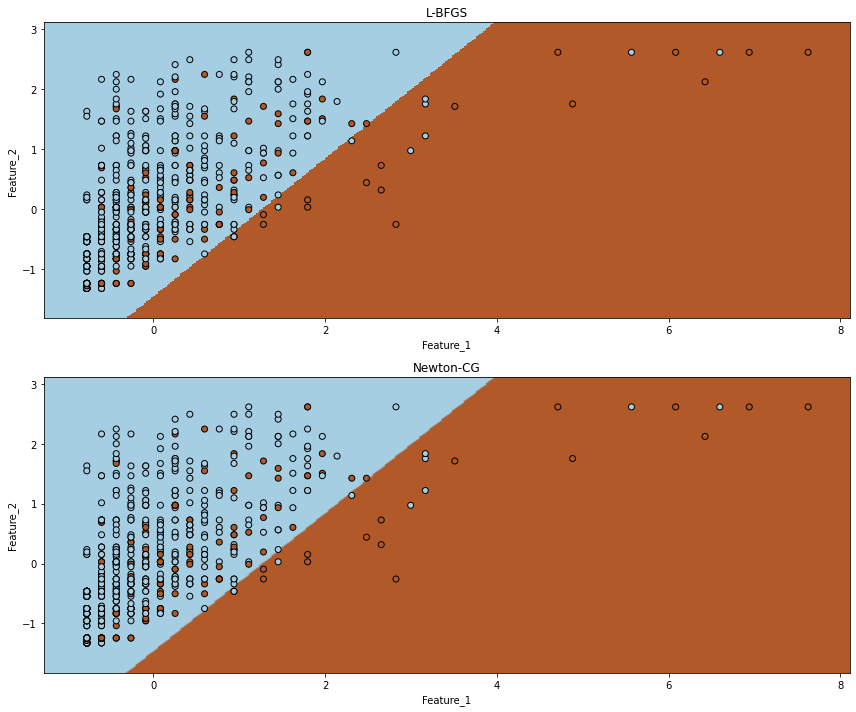

In [16]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X['Feature_1'].min() - 0.5, X['Feature_1'].max() + 0.5
y_min, y_max = X['Feature_2'].min() - 0.5, X['Feature_2'].max() + 0.5
h = 0.02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z_lbfgs = clf_lbfgs.predict(np.c_[xx.ravel(), yy.ravel()])
Z_newt = clf_newt.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z_lbfgs = Z_lbfgs.reshape(xx.shape)
Z_newt = Z_newt.reshape(xx.shape)

fig = plt.figure(figsize=(12, 10))

ax1 = plt.subplot(2, 1, 1)
ax1.pcolormesh(xx, yy, Z_lbfgs, cmap=plt.cm.Paired, shading = 'auto')

# Plot also the training points
ax1.scatter(X['Feature_1'], X['Feature_2'], c=y, edgecolors="k", cmap=plt.cm.Paired)
ax1.set_xlabel("Feature_1")
ax1.set_ylabel("Feature_2")

ax1.set_xlim(xx.min(), xx.max())
ax1.set_ylim(yy.min(), yy.max())
ax1.set_title('L-BFGS')
#ax1.set_xticks(())
#ax1.set_yticks(())

ax2 = plt.subplot(2, 1, 2)
ax2.pcolormesh(xx, yy, Z_newt, cmap=plt.cm.Paired, shading = 'gouraud')

# Plot also the training points
ax2.scatter(X['Feature_1'], X['Feature_2'], c=y, edgecolors="k", cmap=plt.cm.Paired)
ax2.set_xlabel("Feature_1")
ax2.set_ylabel("Feature_2")

ax2.set_xlim(xx.min(), xx.max())
ax2.set_ylim(yy.min(), yy.max())
ax2.set_title('Newton-CG')
#ax1.set_xticks(())
#ax1.set_yticks(())
plt.tight_layout()
plt.show()

In [17]:
# Accuracy
print("Accuracy using L-BFGS: {}".format(accuracy(clf_lbfgs.predict(X_test), y_test)))
print("Accuracy using Newton-CG: {}".format(accuracy(clf_newt.predict(X_test), y_test)))

Accuracy using L-BFGS: 79.33%
Accuracy using Newton-CG: 79.33%
